In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [19]:
df = pd.read_csv('wine_data.csv' , header = None , usecols =[0,1,2])
df.columns = ['Class label' , 'Alcohol' , 'Malic acid']

In [23]:
df.head()

,Class label,Alcohol,Malic acid
0,1,14.23,1.71
1,1,13.20,1.78
2,1,13.16,2.36
3,1,14.37,1.95
4,1,13.24,2.59


## Note => A KDE plot (Kernel Density Estimate plot) is a smooth, continuous version of a histogram used to estimate the probability density function (PDF) of a continuous variable.


<Axes: xlabel='Alcohol', ylabel='Density'>

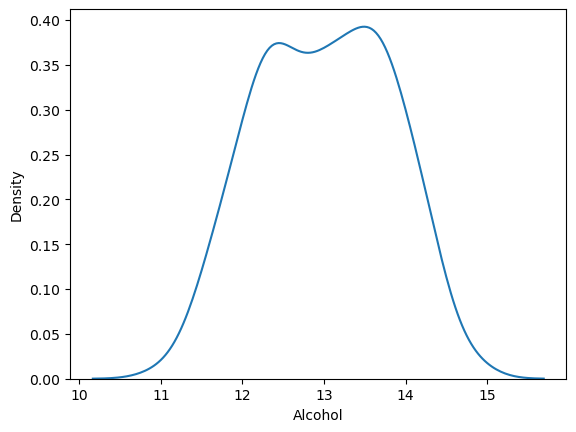

In [25]:
sns.kdeplot(df['Alcohol'])

<Axes: xlabel='Malic acid', ylabel='Density'>

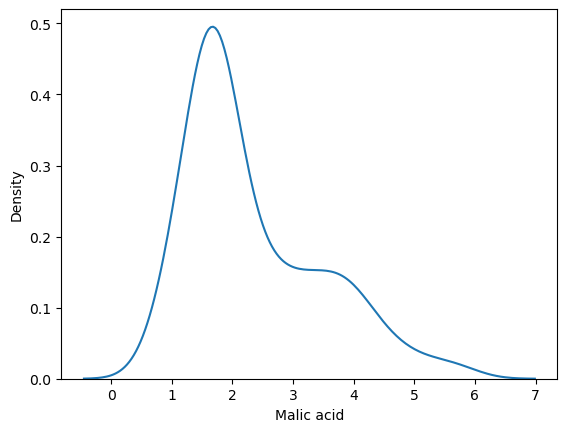

In [28]:
sns.kdeplot(df['Malic acid'])

<Axes: xlabel='Alcohol', ylabel='Malic acid'>

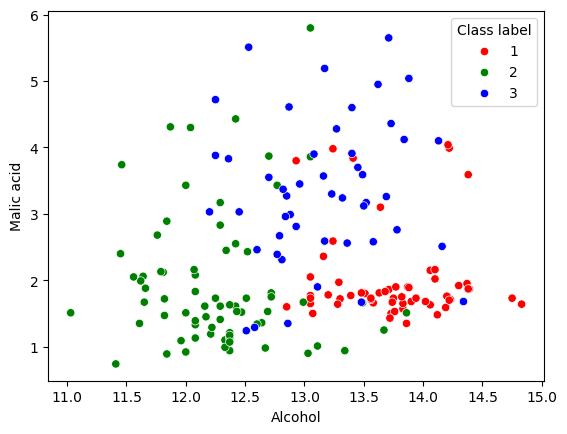

In [47]:
color_dict = {1:'red' , 2:'green' ,3: 'blue'}
sns.scatterplot(x = df['Alcohol'],y = df['Malic acid'], hue = df['Class label'],palette = color_dict)

# TRAIN TEST SPLIT --------------------------->

In [50]:
from sklearn.model_selection import train_test_split

# Note => This line of code is performing a train-test split on your dataset using Scikit-learn’s train_test_split() function.

#  df.drop('Class label', axis=1) => This removes the Class label column from the DataFrame.

# The result is all the input features (X).

# axis=1 =>  means you're dropping a column (not a row).

# df['Class label'] => This selects just the Class label column — your target variable (y).



X_train , X_test , y_train , y_test = train_test_split(df.drop('Class label' , axis = 1),
                                                       df['Class label'],
                                                       test_size = 0.3,
                                                        random_state = 0)

X_train.shape , X_test.shape

((124, 2), (54, 2))

# MINMAX SCALER --------------->

In [58]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

# Fit the scaler to the train set , it will learn the parameters ----------->
scaler.fit(X_train)

# transform the train and test sets ---------------->
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [98]:
# NOTE => This code is converting the scaled arrays (X_train_scaled and X_test_scaled) back into Pandas 
#           DataFrames and restoring their original column names from X_train and X_test.



X_train_scaled = pd.DataFrame(X_train_scaled , columns = X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled , columns = X_test.columns)

In [100]:
np.round(X_train.describe(),1)

,Alcohol,Malic acid
count,124.0,124.0
mean,13.0,2.4
std,0.8,1.1
min,11.0,0.9
25%,12.4,1.6
50%,13.0,1.9
75%,13.6,3.2
max,14.8,5.6


In [102]:
X_train_scaled.describe()

,Alcohol,Malic acid
count,124.000000,124.000000
mean,0.525017,0.313805
std,0.215414,0.238802
min,0.000000,0.000000
25%,0.358199,0.150735
50%,0.540323,0.209034
75%,0.701613,0.495273
max,1.000000,1.000000


In [66]:
np.round(X_test.describe(),1)

,Alcohol,Malic acid
count,54.0,54.0
mean,13.0,2.2
std,0.8,1.1
min,11.4,0.7
25%,12.4,1.6
50%,13.0,1.8
75%,13.7,2.7
max,14.8,5.8


In [68]:
np.round(X_test_scaled.describe(),1)

,Alcohol,Malic acid
count,54.0,54.0
mean,0.5,0.3
std,0.2,0.2
min,0.1,-0.0
25%,0.4,0.1
50%,0.5,0.2
75%,0.7,0.4
max,1.0,1.0


Text(0.5, 1.0, 'After Scaling')

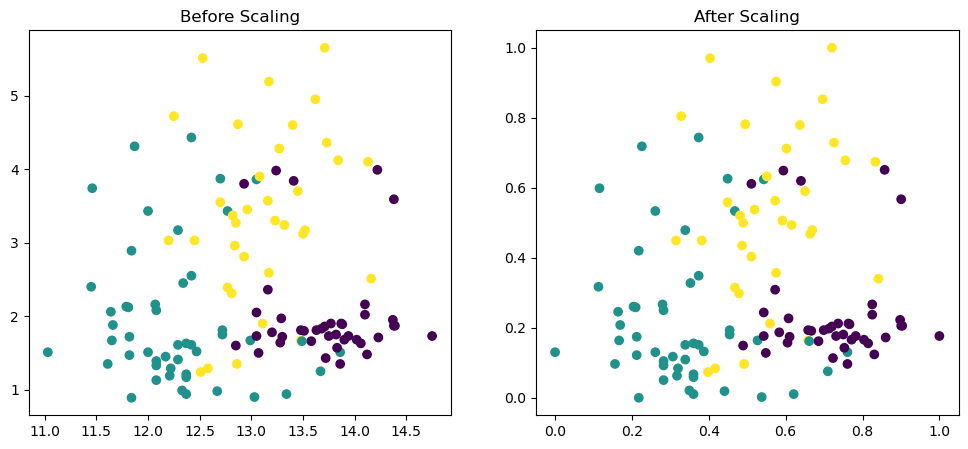

In [118]:
fig,(ax1 , ax2) = plt.subplots(ncols = 2 , figsize =(12,5))

ax1.scatter(X_train['Alcohol'],X_train['Malic acid'] , c = y_train)
ax1.set_title("Before Scaling")
ax2.scatter(X_train_scaled['Alcohol'],X_train_scaled['Malic acid'] , c = y_train)
ax2.set_title("After Scaling")

<Axes: title={'center': 'After Scaling'}, xlabel='Alcohol', ylabel='Density'>

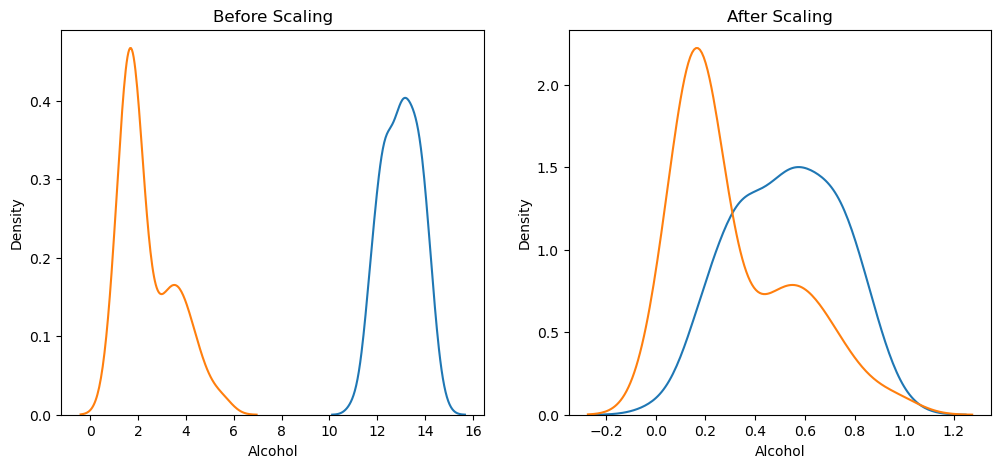

In [124]:
fig,(ax1 , ax2) = plt.subplots(ncols = 2 , figsize =(12,5))

# Before Scaling =>
ax1.set_title('Before Scaling')
sns.kdeplot(X_train['Alcohol'] ,ax = ax1)
sns.kdeplot(X_train['Malic acid'] ,ax = ax1)

# After Scaling =>
ax2.set_title('After Scaling')
sns.kdeplot(X_train_scaled['Alcohol'],ax = ax2)
sns.kdeplot(X_train_scaled['Malic acid'], ax= ax2)

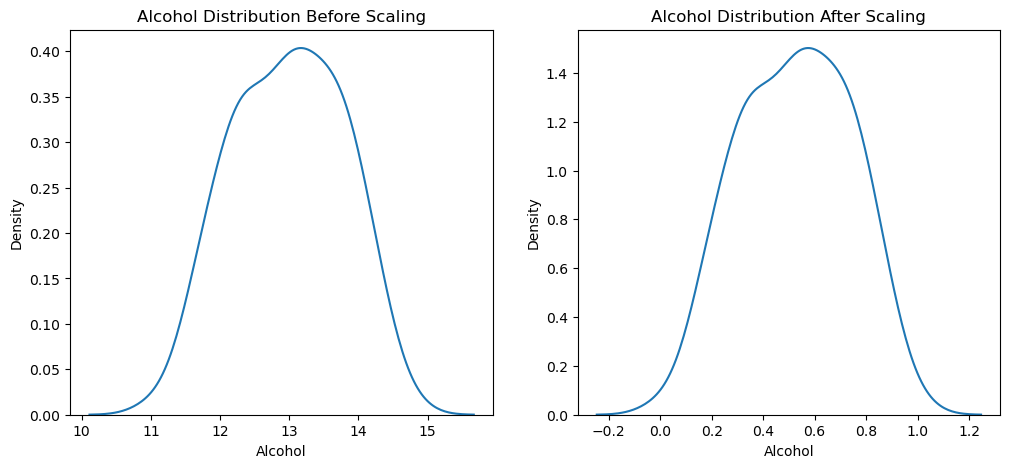

In [126]:
fig,(ax1 , ax2) = plt.subplots(ncols = 2 , figsize =(12,5))

# Before Scaling =>
ax1.set_title('Alcohol Distribution Before Scaling')
sns.kdeplot(X_train['Alcohol'] ,ax = ax1)

# After Scaling =>
ax2.set_title('Alcohol Distribution After Scaling')
sns.kdeplot(X_train_scaled['Alcohol'],ax = ax2)

plt.show()

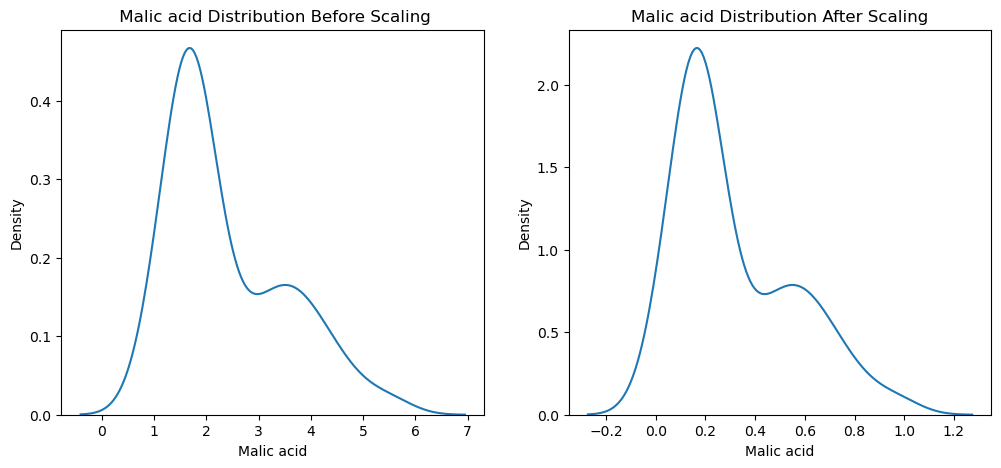

In [128]:
fig,(ax1 , ax2) = plt.subplots(ncols = 2 , figsize =(12,5))

# Before Scaling =>
ax1.set_title(' Malic acid Distribution Before Scaling')
sns.kdeplot(X_train['Malic acid'] ,ax = ax1)

# After Scaling =>
ax2.set_title('Malic acid Distribution After Scaling')
sns.kdeplot(X_train_scaled['Malic acid'],ax = ax2)

plt.show()